<a href="https://colab.research.google.com/github/iam-fern/Research/blob/main/generate_data_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import normal
import statistics
import statistics as stats
import scipy.stats as ss
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
%matplotlib inline
from google.colab import files

In [37]:
# random.uniform(a, b)
# Syntax : numpy.random.uniform(low=0.0, high=1.0, size=None)
# a : Required. A number specifying the lowest possible outcome
# b : Required. A number specifying the highest possible outcome

data = pd.DataFrame({"z1" : np.random.uniform(10, 50, 500000),
                     "z2" : np.random.uniform(10, 50, 500000),
                     "z3" : np.random.uniform(10, 50, 500000)})
data

,z1,z2,z3
0,38.278675,34.225605,30.737150
1,13.374242,25.186380,35.492232
2,19.004055,32.424357,30.502729
3,45.496783,14.471168,13.519764
4,25.657974,45.725183,22.883904
...,...,...,...
499995,30.168489,12.033133,13.064841
499996,24.587687,17.459267,21.261633
499997,42.511001,21.658928,28.763786
499998,20.405703,11.602083,35.872333


In [38]:
z1 = data['z1']
z2 = data['z2']
z3 = data['z3']

In [39]:
x1 = z1
x2 = z2
x3 = z3

In [40]:
new_data = pd.DataFrame({"x1" : data['z1'],
                         "x2" : data['z2'],
                         "x3" : data['z3'],
                         "e"  : np.random.normal(0, x1**8, 500000)})

In [47]:
n=50
rep=0
table_data_all=pd.DataFrame({"rep":[]})
data_copy=new_data.copy()
while not data_copy.empty:
    #=========================
    if data_copy.shape[0]>n:
        index=data_copy.sample(n).index
        data_new=data_copy.loc[index,:].reset_index(drop=True)
        data_copy=data_copy.drop(index)
    else:
        data_new=data_copy.copy().reset_index(drop=True)
        data_copy=pd.DataFrame({"":[]})
    #=========================

    table_data = pd.DataFrame({'x1' : data_new['x1'],
                               'x2' : data_new['x2'],
                               'x3' : data_new['x3'],
                               'e'  : data_new['e']})
  

    table_data['Y'] = 5 + 10*table_data['x1'] + table_data['x2'] + table_data['x3'] + table_data['e']
    #table_data['Y_hat'] = 4+0.4*table_data['Xt1']+1.5*table_data['Xt2']+3.6*table_data['Xt3']
    
    table_data=table_data.reset_index(drop=True).reset_index()
    table_data["rep"]=rep
    table_data_all=pd.concat([table_data_all,table_data],axis=0,ignore_index=True,sort=False)
    rep+=1
    if rep==1000:
      break
table_data_all=table_data_all.set_index(["rep","index"])
table_data_all

x1         x2         x3             e             Y
rep   index                                                             
0.0   0.0    26.154567  10.209535  48.153088  3.133036e+10  3.133036e+10
      1.0    38.382103  32.032779  12.521225 -4.106260e+12 -4.106260e+12
      2.0    18.324124  23.444792  44.631320  1.699491e+10  1.699491e+10
      3.0    10.000008  49.305944  35.024324  5.068413e+07  5.068432e+07
      4.0    43.781407  42.580957  27.715482  1.674949e+13  1.674949e+13
...                ...        ...        ...           ...           ...
999.0 45.0   43.546431  17.782354  19.563966  1.367144e+13  1.367144e+13
      46.0   16.069590  43.882442  41.851360  3.346198e+09  3.346198e+09
      47.0   22.722670  46.040550  46.308728  5.927896e+10  5.927896e+10
      48.0   47.783214  27.989152  23.833518 -1.983001e+13 -1.983001e+13
      49.0   19.207561  46.395556  18.653260  1.179432e+10  1.179432e+10

[50000 rows x 5 columns]

In [48]:
x = table_data_all[['x1', 'x2', 'x3',]]
y = table_data_all['Y']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
y_pred = model.predict(x)

In [49]:
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})

In [50]:
table_data_new = pd.DataFrame({'x1'   : table_data_all['x1'],
                               'x2'   : table_data_all['x2'],
                               'x3'   : table_data_all['x3'],
                               'e'     : table_data_all['e'],
                               'Y'     : df['Actual'],
                               'y_hat' : df['Predicted']})
table_data_new['e_hat'] = table_data_new['Y']-table_data_new['y_hat']
table_data_new

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    26.154567  10.209535  ...  3.227830e+10 -9.479326e+08
      1.0    38.382103  32.032779  ...  1.059059e+11 -4.212166e+12
      2.0    18.324124  23.444792  ... -3.317305e+10  5.016796e+10
      3.0    10.000008  49.305944  ... -1.209984e+11  1.210491e+11
      4.0    43.781407  42.580957  ...  7.868071e+10  1.667081e+13
...                ...        ...  ...           ...           ...
999.0 45.0   43.546431  17.782354  ...  1.539471e+11  1.351749e+13
      46.0   16.069590  43.882442  ... -8.983237e+10  9.317856e+10
      47.0   22.722670  46.040550  ... -7.007426e+10  1.293532e+11
      48.0   47.783214  27.989152  ...  1.420384e+11 -1.997205e+13
      49.0   19.207561  46.395556  ... -3.718543e+10  4.897975e+10

[50000 rows x 7 columns]

In [51]:
table_data_new.to_csv('sampling_1000rep_n50_x8_sas.csv')
files.download('sampling_1000rep_n50_x8_sas.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

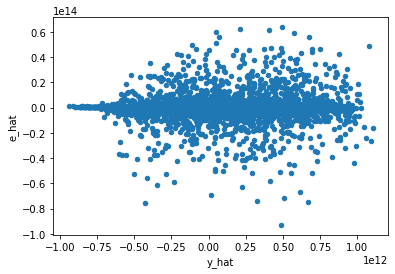

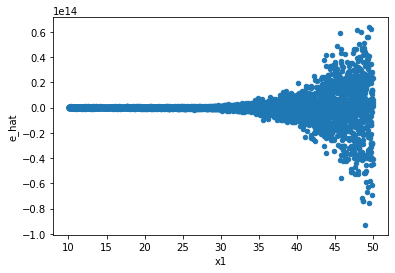

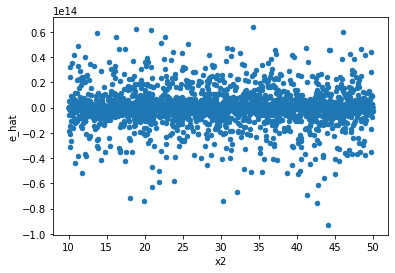

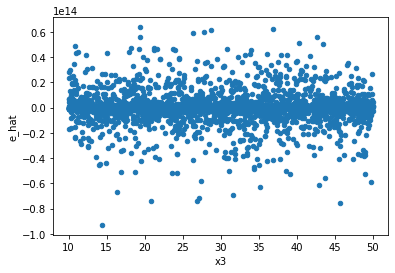

In [46]:
table_data_new.plot(x ='y_hat', y='e_hat', kind = 'scatter')
table_data_new.plot(x ='x1', y='e_hat', kind = 'scatter')
table_data_new.plot(x ='x2', y='e_hat', kind = 'scatter')
table_data_new.plot(x ='x3', y='e_hat', kind = 'scatter')